# Τεχνικές Εξόρυξης Δεδομένων - Εαρινό Εξάμηνο 2020-2021 1η Άσκηση
### ΠΖΕΣΤΖΕΛΣΚΙ ΜΑΤΣΙΕΪ sdi1600136
### ΧΑΡΑΛΑΜΠΗΣ ΑΡΗΣ sdi1600192

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import matplotlib 

%matplotlib inline 

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.8 (tags/v3.6.8:3c6b436a57, Dec 24 2018, 00:16:47) [MSC v.1916 64 bit (AMD64)]
Pandas version 1.1.5
Matplotlib version 3.3.4


## 1. "Διάβασμα" Dataset

In [3]:
# Δημιουργία 3 dataframe διαβάζοντας τα csv που δόθηκαν.

# Τοποθετήστε το δικό σας path 
movies  = r'D:/Desktop/ted/IMDb movies.csv'
ratings = r'D:/Desktop/ted/IMDb ratings.csv'
netflix = r'D:/Desktop/ted/netflix_titles.csv'

#movies  = r'C:/bashs/IMDb movies.csv'
#ratings = r'C:/bashs/IMDb ratings.csv'
#netflix = r'C:/bashs/netflix_titles.csv'

df_m = pd.read_csv(movies)
df_r = pd.read_csv(ratings)
df_n = pd.read_csv(netflix)

C:\Users\Aris\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# Εκτύπωση των IMDb movies
#df_m

In [ ]:
# Εκτύπωση των IMDb ratings
#df_r

In [ ]:
# Εκτύπωση των netflix titles
#df_n

## 2. Ερωτήματα

Movie      5377
TV Show    2410
Name: type, dtype: int64

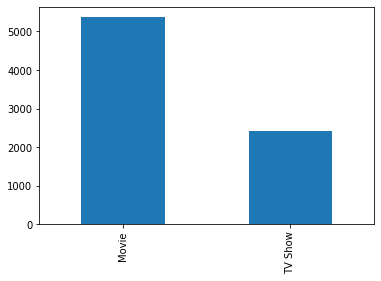

In [4]:
# 1. Ποιό είδος υπερτερεί, οι ταινίες ή οι σειρές ;

# Διαγραφή των κενών γραμμών

df_n1 = df_n.dropna(subset=['type'])

# Εύρεση είδους
Tainies_Seires=df_n1['type'].value_counts()[:2].sort_values(ascending=False)

# Δημιουργία Γραφήματος
# Εκτύπωση ταξινομημένου πίνακα τιμών

Tainies_Seires.plot.bar()
Tainies_Seires

Movie      3125
TV Show    1785
Name: type, dtype: int64

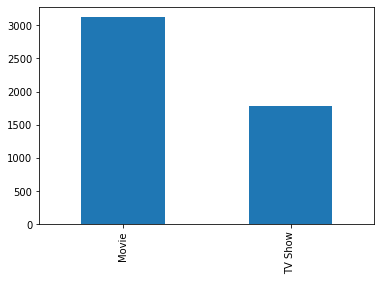

In [5]:
# 2. Τα τελευταία χρόνια το netflix επενδύει περισσότερο σε ταινίες ή σε σειρές;

# Διαγραφή των γραμμών 
df_n2 = df_n.dropna(subset=['type'])
df_n2 = df_n2.dropna(subset=['release_year'])

filtered_df = df_n2.loc[(df_n2['release_year'] > 2015 ) ]
Tainies_Seires=filtered_df['type'].value_counts()[:2].sort_values(ascending=False)

# Δημιουργία Γραφήματος
# Εκτύπωση ταξινομημένου πίνακα τιμών

Tainies_Seires.plot.bar()
Tainies_Seires

,country,num_of_content
113,United States,3296
43,India,990
111,United Kingdom,722
19,Canada,412
34,France,349


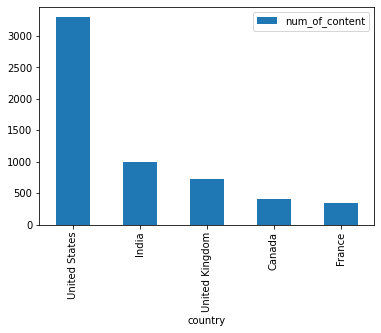

In [6]:
# 3. Ποιά χώρα έχει το περισσότερο περιεχόμενο;

# Απομάκρυνση των γραμμών που έχουν κενη χώρα
df = df_n.dropna(subset=['country'])

# Δημιουργία γραμμών για το περιεχόμενο που έχουν συμβάλει πολλές χώρες
df2 = df.drop('country', axis=1).join(df['country'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('country'))

# Ομαδοποίηση ανά χώρα 
df3 = df2.groupby('country')['show_id'].count().reset_index(name = 'num_of_content')

# Διάταξη των στοιχείων και εμφάνισή τους
df3.sort_values(by = ['num_of_content'], inplace = True, ascending = False)
df3.head().set_index('country').plot(kind = "bar")
df3.head()

In [7]:
# 4. Τι είδους περιεχόμενο έχει κάθε χώρα;

# Απομάκρυνση των γραμμών που έχουν κενη χώρα και κενο ειδος
df = df_n.dropna(subset=['listed_in'])
df = df.dropna(subset=['country'])

# Δημιουργία γραμμών για το περιεχόμενο που έχουν συμβάλει πολλές χώρες, πολλά είδη
df2 = df.drop('country', axis=1).join(df['country'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('country'))

df3 = df2.drop('listed_in', axis=1).join(df2['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('listed_in'))

# Καθαρισμός από διπλότυπα
df3.drop_duplicates(keep = 'first', inplace = True)

# Ομαδοποίηση ανά χώρα 
df4 = df3.groupby(['country','listed_in'])['show_id'].count().reset_index(name = 'num_of_genre')
print(df4)


           country             listed_in  num_of_genre
0      Afghanistan         Documentaries             1
1      Afghanistan  International Movies             1
2          Albania                Dramas             1
3          Albania  International Movies             1
4          Algeria        Classic Movies             1
...            ...                   ...           ...
1347  West Germany             Thrillers             1
1348      Zimbabwe              Comedies             1
1349      Zimbabwe         Documentaries             2
1350      Zimbabwe  International Movies             3
1351      Zimbabwe       Romantic Movies             1

[1352 rows x 3 columns]


              country                  cast  num_of_content
21862  United Kingdom           John Cleese              11
22326  United Kingdom         Michael Palin               9
21612  United Kingdom  Helena Bonham Carter               8
21441  United Kingdom             Eric Idle               7
22809  United Kingdom           Samuel West               7


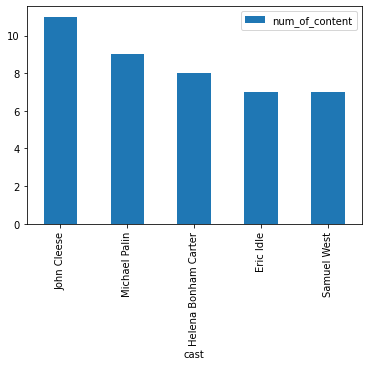

In [8]:
# 5. Ετοιμάστε γραφήματα που δειχνουν τους ηθοποιούς με τις περισσότερες ταινίες σε κάθε χώρα. Κάντε το ίδιο και για τις σειρές.

# Συνάρτηση που δέχεται σαν παραμέτρους χώρα και τύπο(ταινία, σειρά) και επιστρέφει ηθοποιούς με τις περισσότερες συμμέτοχες σε αυτή τη χώρα 
def Meg_emf_hfo_xwres(df_def,type,country):

    # Απομάκρυνση των γραμμών που έχουν κενη χώρα, cast kai genre
    df = df_def.dropna(subset=['cast'])
    df = df.dropna(subset=['country'])
    df = df.dropna(subset=['type'])

    # Xwrismos
    df_Xwrismos=df.loc[(df['type'] == type ) ]

    # Δημιουργία γραμμών για το περιεχόμενο που έχουν συμβάλει πολλές χώρες
    df2 = df_Xwrismos.drop('country', axis=1).join(df['country'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('country'))
    df3 = df2.drop('cast', axis=1).join(df2['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('cast'))

    # Καθαρισμός από διπλότυπα
    df3.drop_duplicates(keep = 'first', inplace = True)

    # Ομαδοποίηση ανά χώρα 
    df4 = df3.groupby(['country','cast'])['show_id'].count().reset_index(name = 'num_of_content')

    # Epilogh xwras
    df5 = df4.loc[(df4['country'] == country ) ]

    # Διάταξη των στοιχείων και εμφάνισή τους
    df_sort = df5.sort_values(['num_of_content'], ascending = False)
    df_sort.head().set_index('cast').plot(kind = "bar")
    print(df_sort.head())
                
# Παράδειγμα
Meg_emf_hfo_xwres(df_n,'Movie','United Kingdom' )


        rating  num_of_reports
1       Mature            1020
3        Teens             659
2   Older Kids             478
0  Little Kids             246


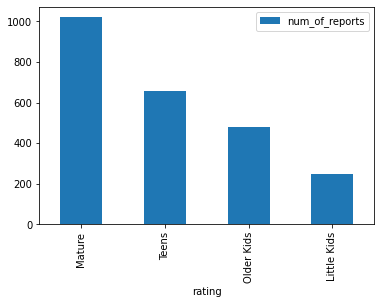

In [9]:
# 6. Το netflix υποστηρίζει ότι παρέχει πλούσιο περιεχόμενο για όλες τις ηλικίες. Αληθεύει αυτό;
# Φτιάξτε ένα γράφημα το οποίο συγκεντρώνει το πλήθος των ταινιων ανάλογα με την προτεινόμενη ηλικία (αναφερόμαστε στη στήλη rating). 
# Τα όρια καθορίζονται σύμφωνα με τον παρακάτω πίνακα. Κάντε το ίδιο γράφημα και για τις σειρές.
# |Little Kids|       Older Kids      |   Teens   |    Mature   |
# |G,TV-Y,TV-G|PG,TV-Y7,TV-Y7-FV,TV-PG|PG-13,TV-14|R,NC-17,TV-MA|

# Επιστέφει το πλήθος των ταινιων/ σειρών ανάλογα με την προτεινόμενη ηλικία
def Kat_Hlik_Netflix(df_def,type_def):

    # Απομάκρυνση των γραμμών που έχουν κενό τύπο ή βαθμολογία
    df = df_def.dropna(subset=['rating'])
    df = df.dropna(subset=['type'])

    # Bohfitikes egkafariseis
    df.drop(df.loc[df['rating'] == 'NR'].index, inplace=True) #Den exoun xarakthristh
    df.drop(df.loc[df['rating'] == 'UR'].index, inplace=True) #Den exoun xarakthristh

    #Epilogh xwras
    df = df.loc[(df['type'] == type_def ) ]

    # Prosarmogh dedomenwn
    df1 = df.replace(to_replace =['G','TV-Y','TV-G'],value = 'Little Kids')
    df2 = df1.replace(to_replace =['PG','TV-Y7','TV-Y7-FV','TV-PG'],value = 'Older Kids')
    df3 = df2.replace(to_replace =['PG-13','TV-14'],value = 'Teens')
    df4 = df3.replace(to_replace =['R','NC-17','TV-MA'],value = 'Mature')

    # Ομαδοποίηση ανά χώρα 
    df5 = df4.groupby('rating')['show_id'].count().reset_index(name = 'num_of_reports')

    # Διάταξη των στοιχείων και εμφάνισή τους
    df5.sort_values(by = ['num_of_reports'], inplace = True, ascending = False)
    df5.head().set_index('rating').plot(kind = "bar")
    print(df5.head())

# Eκτέλεση της συνάρτησης για 'TV Show'
Kat_Hlik_Netflix(df_n,'TV Show')

    Month  num_of_productions
11     12                 774
9      10                 725
0       1                 711
10     11                 703
2       3                 626
7       8                 576
6       7                 574
3       4                 567
8       9                 565
5       6                 505
4       5                 490
1       2                 455


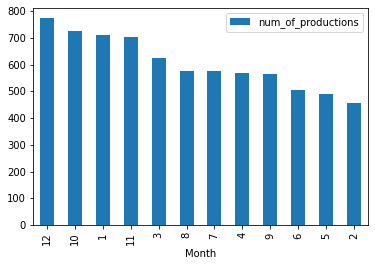

In [11]:
# 7. Αν ένας παραγωγός ήθελε να έχει υψηλή ακροαματικότητα, σκέφτεται ότι θα ήταν ίσως καλύτερα να βγάλει την ταινία του σε μία εποχή που 
# δεν υπάρχει ανταγωνισμός. Κάντε ένα γράφημα με το περιεχόμενο που προστίθεται ανά μήνα για να τον βοηθήσετε να επιλέξει τη σωστή χρονική 
# περίοδο.

# Απομάκρυνση των γραμμών που έχουν κενη ημερομηνία
df = df.dropna(subset=['date_added'])

# Dhmiourgia neas sthlhs(bohfitikhs) mono me tous mhnes(se int)
df['Month'] = pd.DatetimeIndex(df['date_added']).month

# Ομαδοποίηση ανά χώρα 
df2 = df.groupby('Month')['show_id'].count().reset_index(name = 'num_of_productions')

# Διάταξη των στοιχείων και εμφάνισή τους
df2.sort_values(by = ['num_of_productions'], inplace = True, ascending = False)
df2.plot.bar("Month")
print(df2)

,listed_in,num_of_productions
16,International Movies,2437
12,Dramas,2106
7,Comedies,1471
17,International TV Shows,1199
10,Documentaries,786
0,Action & Adventure,721
34,TV Dramas,704
15,Independent Movies,673
4,Children & Family Movies,532
24,Romantic Movies,531


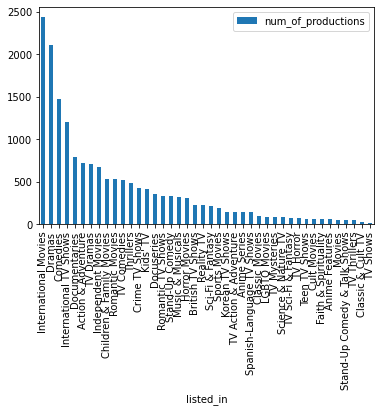

In [12]:
# 8. Ετοιμάστε ένα γράφημα που παρουσιάζει συγκεντρωτικά τα είδη του περιεχομένου (αναφερόμαστε στη στήλη listed_in).

# Απομάκρυνση των γραμμών που έχουν κενο είδος
df = df_n.dropna(subset=['listed_in'])

# Δημιουργία γραμμών για το περιεχόμενο που έχουν συμβάλει 2 χώρες
df2 = df.drop('listed_in', axis=1).join(df['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('listed_in'))

# Ομαδοποίηση ανά χώρα 
df2 = df2.groupby('listed_in')['show_id'].count().reset_index(name = 'num_of_productions')

# Διάταξη των στοιχείων και εμφάνισή τους
df2.sort_values(by = ['num_of_productions'], inplace = True, ascending = False)
df2.plot.bar("listed_in")
df2

     country  num_of_productions
4285     USA               30453
2064   India                6352
3887      UK                4377
2486   Japan                3255
1116  France                3239


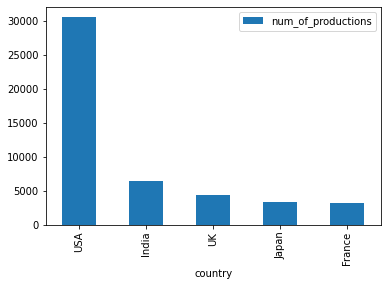

In [13]:
# 9. Μελετηστε τους σκηνοθέτες ανά χώρα και παρουσιάστε σχετικά γραφήματα.

def Plhfos_skhnofetwn_ana_xwra(df_def,plhfos_xwrwn=5):

    # Απομάκρυνση των γραμμών που έχουν κενο σκηνοθέτη
    df = df_def.dropna(subset=['director'])

    #Δημιουργία γραμμών για το περιεχόμενο που έχουν συμβάλει 2 χώρες
    df2 = df.drop('director', axis=1).join(df['director'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('director'))

    # Ομαδοποίηση ανά χώρα 
    df2 = df2.groupby('country')['imdb_title_id'].count().reset_index(name = 'num_of_productions')

    # Διάταξη των στοιχείων και εμφάνισή τους
    df2.sort_values(by = ['num_of_productions'], inplace = True, ascending = False)
    df2.head(plhfos_xwrwn).set_index('country').plot(kind = "bar")
    print(df2.head(plhfos_xwrwn))

def Top_skhnofetes_ana_xwra(df_def,country_def,plhfos_xwrwn=5):

    # Απομάκρυνση των γραμμών που έχουν κενη παραγωγό ή ημερομηνια
    df = df_def.dropna(subset=['director'])

    #Δημιουργία γραμμών για το περιεχόμενο που έχουν συμβάλει 2 χώρες
    df2 = df.drop('country', axis=1).join(df['country'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('country'))
    df3 = df2.drop('director', axis=1).join(df2['director'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('director'))

    #Kafarismos apo diplotupa
    df3.drop_duplicates(keep = 'first', inplace = True)

    # Ομαδοποίηση ανά χώρα 
    df4 = df3.groupby(['country','director'])['imdb_title_id'].count().reset_index(name = 'num_of_content')

    #Epilogh xwras
    df5 = df4.loc[(df4['country'] == country_def ) ]

    # Διάταξη των στοιχείων και εμφάνισή τους
    df_sort = df5.sort_values(['num_of_content'], ascending = False)
    df_sort.head(plhfos_xwrwn).set_index('director').plot(kind = "bar")
    print(df_sort.head(plhfos_xwrwn))

# Ektelesei twn 2 sunarthsewn

Plhfos_skhnofetwn_ana_xwra(df_m)

#Top_skhnofetes_ana_xwra(df_m,'Poland')


,duration,num_of_content
0,1 Season,1608
7,2 Seasons,382
8,3 Seasons,184
9,4 Seasons,87
10,5 Seasons,58


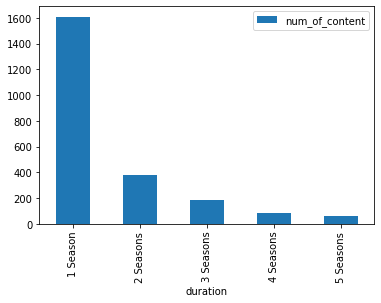

In [14]:
# 10. Μελετήστε τις σειρές και παρουσιάστε ένα γράφημα που τις δείχνει ανάλογα με το αριθμό των seasons.

# Απομάκρυνση των γραμμών που έχουν κενο duration
df = df_n.dropna(subset=['duration'])

# Epilogh xwras
df2 = df.loc[(df['type'] == 'TV Show' ) ]

# Ομαδοποίηση ανά χώρα 
df3 = df2.groupby(['duration'])['show_id'].count().reset_index(name = 'num_of_content')

# Διάταξη των στοιχείων και εμφάνισή τους
df3.sort_values(by = ['num_of_content'],inplace = True, ascending = False)
df3.head().set_index('duration').plot(kind = "bar")
df3.head()



,title,avg_vote
1547,Pulp Fiction,8.9
1704,Schindler's List,8.9
926,Inception,8.8
455,City of God,8.6
766,Gol Maal,8.6
159,Ani... Dr. Kashinath Ghanekar,8.6
1440,Oththa Seruppu Size 7,8.6
1075,Koshish,8.6
611,Eh Janam Tumhare Lekhe,8.6
1337,Much Ado About Nothing,8.6


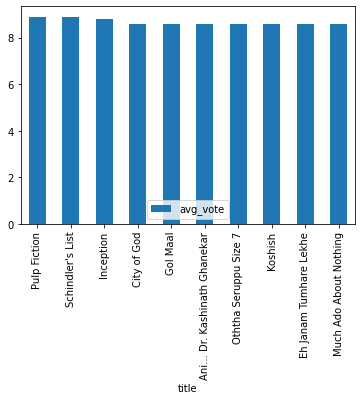

In [15]:
# 11. Αξιοποιήστε τα υπόλοιπα αρχεία της εργασίας για να απαντήσετε στο ερώτημα: Ποιές είναι οι ταινίες με την πιο υψηλή βαθμολογία;
# Θα χρειαστεί να συννενώσετε κατάλληλα τα αρχεία που σας δίνονται ώστε να κρατήσετε τις ταινίες του netflix για τις οποίες υπάρχουν ratings 
# στο IMBD.

# Απομάκρυνση των γραμμών που έχουν κενo τιτλο
df = df_n.dropna(subset=['title'])

#Epilogh xwras
df2 = df.loc[(df['type'] == 'Movie' )]

# Απομάκρυνση των γραμμών που έχουν κενη παραγωγό ή ημερομηνια
df_rat_movie =df_m.dropna(subset=['avg_vote'])

df_enwsh = pd.merge(left = df2, right = df_rat_movie, left_on = 'title', right_on = 'title')

# Διάταξη των στοιχείων και εμφάνισή τους
df_sort = df_enwsh.sort_values(['avg_vote'], ascending = False)

df_emfanisei = df_sort[['title','avg_vote']]

df_emfanisei[:10].plot.bar('title')
df_emfanisei[:10]

## Recommendation system

In [16]:
# Προετοιμασία βάσης
netflix = r'D:/Desktop/ted/netflix_titles.csv'

df_n = pd.read_csv(netflix)

df = df_n.dropna(subset=['type'])
df = df[df['type'] != 'TV Show']

df = df[['show_id','title','description']]
df = df.reset_index(drop=True)

In [17]:
# Δημιουργία του vocabulary

vocal = []
for index, row in df.iterrows():
    vocal.append(row['description'])

### 1. boolean BoW  TF-IDF

In [18]:
# 1.α boolean BoW

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(ngram_range=(1, 2), stop_words = 'english', min_df = 15)

BoW = vec.fit_transform(vocal)

elem = BoW.toarray()
col = vec.get_feature_names()

# Δημιουργία dataframe που κρατά το ΒοW
df_b = pd.DataFrame(elem,columns = col)


In [19]:
# 1.b boolean TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(ngram_range=(1, 2), analyzer = 'word', stop_words = 'english', min_df = 15) 

TF_IDF = vect.fit_transform(vocal)

elems = BoW.toarray()
cols = vect.get_feature_names()

# Δημιουργία dataframe που κρατά το TF-IDF
df_t = pd.DataFrame(elems,columns = cols)

### 2. Jaccard/Tanimoto - Cosine similarity

In [22]:
# Υπολογισμός Jaccard/Tanimoto coefficient
from scipy.spatial.distance import cdist

jac = 1 - cdist(df_b, df_b, 'jaccard')


In [23]:
# Υπολογισμός cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

cos = cosine_similarity(df_t)

In [24]:
jac

array([[1.        , 0.        , 0.        , ..., 0.        , 0.13333333,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.07692308, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.07692308, ..., 1.        , 0.        ,
        0.        ],
       [0.13333333, 0.        , 0.        , ..., 0.        , 1.        ,
        0.06666667],
       [0.        , 0.        , 0.        , ..., 0.        , 0.06666667,
        1.        ]])

In [25]:
cos

array([[1.        , 0.        , 0.        , ..., 0.        , 0.23570226,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.1490712 , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.1490712 , ..., 1.        , 0.        ,
        0.        ],
       [0.23570226, 0.        , 0.        , ..., 0.        , 1.        ,
        0.125     ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.125     ,
        1.        ]])